In [8]:
!uv pip install git+https://github.com/gagan3012/ltr

Using Python 3.11.13 environment at: /usr
   Updating https://github.com/gagan3012/ltr (HEAD)
   Updating https://github.com/gagan3012/ltr (HEAD)
   Updating https://github.com/gagan3012/ltr (HEAD)
   Updating https://github.com/gagan3012/ltr (HEAD)
   Updating https://github.com/gagan3012/ltr (HEAD)
   Updating https://github.com/gagan3012/ltr (HEAD)
   Updating https://github.com/gagan3012/ltr (HEAD)
   Updating https://github.com/gagan3012/ltr (HEAD)
    Updated https://github.com/gagan3012/ltr (9c6eb0ccba33df62345a2ac6761b006df4876d
Resolved 117 packages in 4.24s
   Building ltr @ git+https://github.com/gagan3012/ltr@9c6eb0ccba33df62345a2ac6761b0
   Building ltr @ git+https://github.com/gagan3012/ltr@9c6eb0ccba33df62345a2ac6761b0
   Building ltr @ git+https://github.com/gagan3012/ltr@9c6eb0ccba33df62345a2ac6761b0
   Building ltr @ git+https://github.com/gagan3012/ltr@9c6eb0ccba33df62345a2ac6761b0
   Building ltr @ git+https://github.com/gagan3012/ltr@9c6eb0ccba33df62345a2ac6761b0
 

Stage 1: Computing concept importance...
Stage 2: Generating patched representations...
Stage 3: Identifying spurious spans...


Analyzing spans: 100%|██████████| 42/42 [00:38<00:00,  1.09it/s]


Visualizing semantic drift...
Generating concept network visualization...
Generating activation distributions visualization...
Generating concept correlation matrix...
Analysis complete!
Generated visualizations:
 - semantic_drift_trajectory.png
 - activation_distributions.png
 - token_wise_drift.png

Hallucination Analysis:
Top spurious spans related to 'yes':
 - 'I am at' (score: 0.0000)
 - 'I am at a concert.' (score: 0.0000)
 - 'I am at a concert. I see' (score: 0.0000)


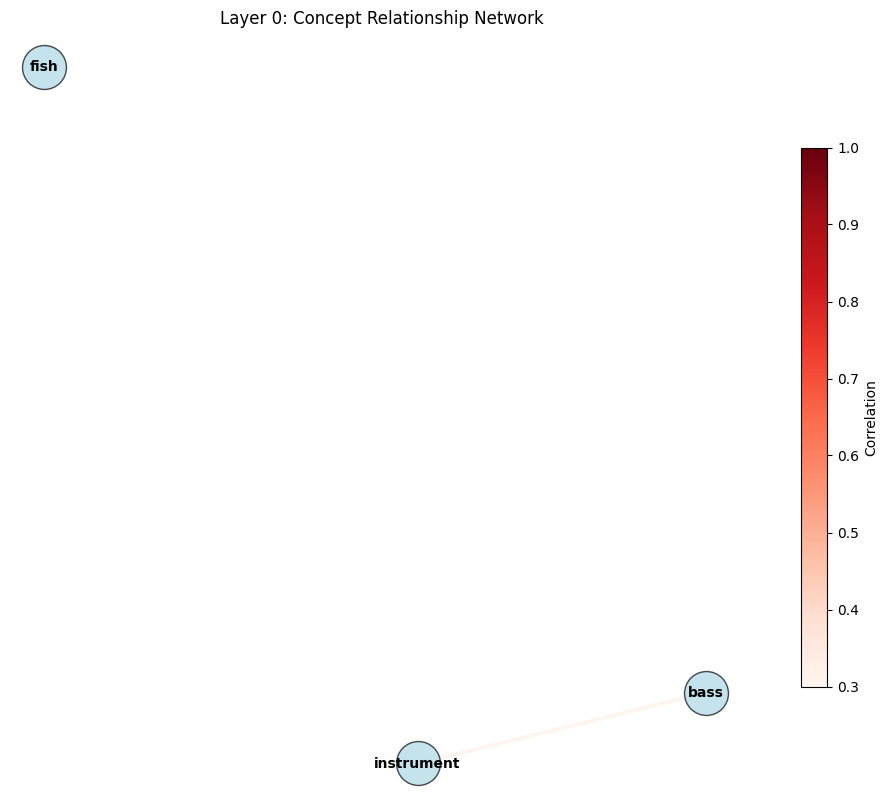

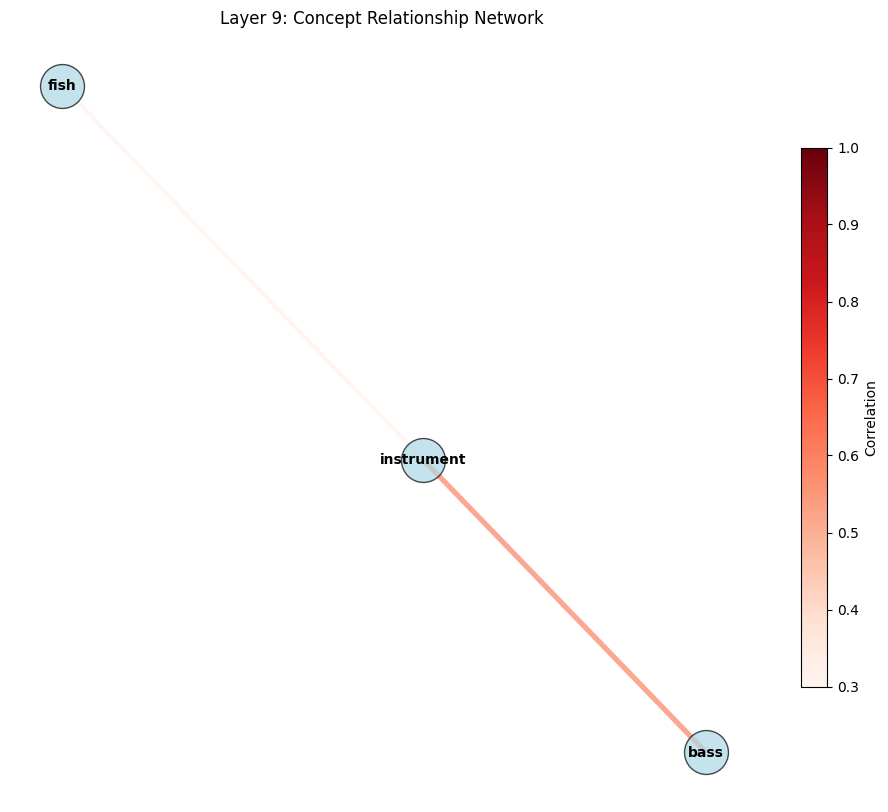

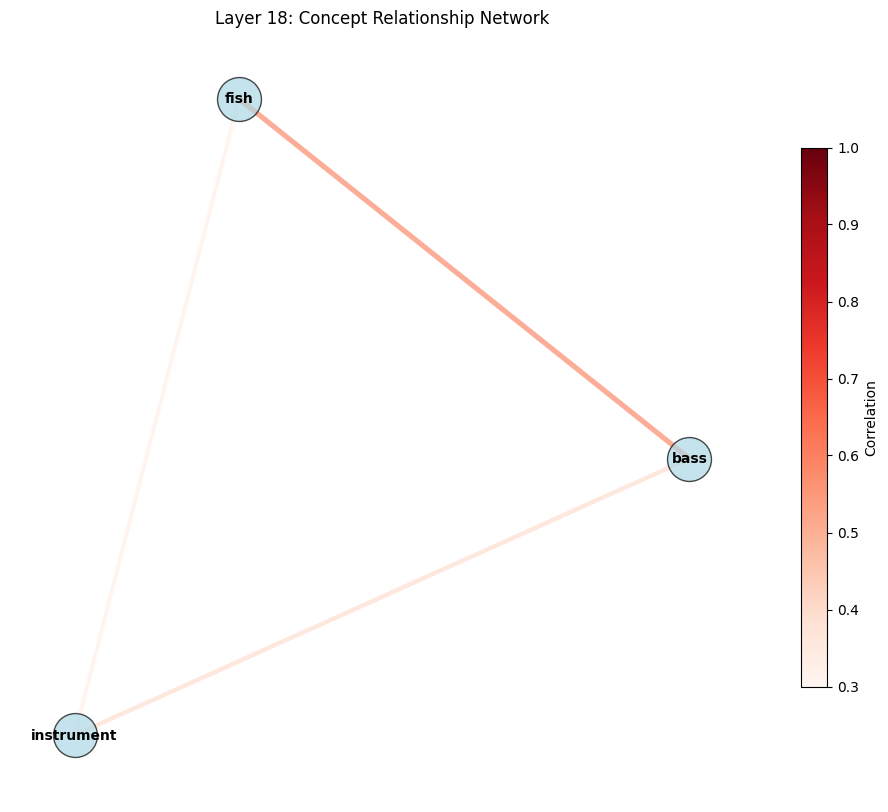

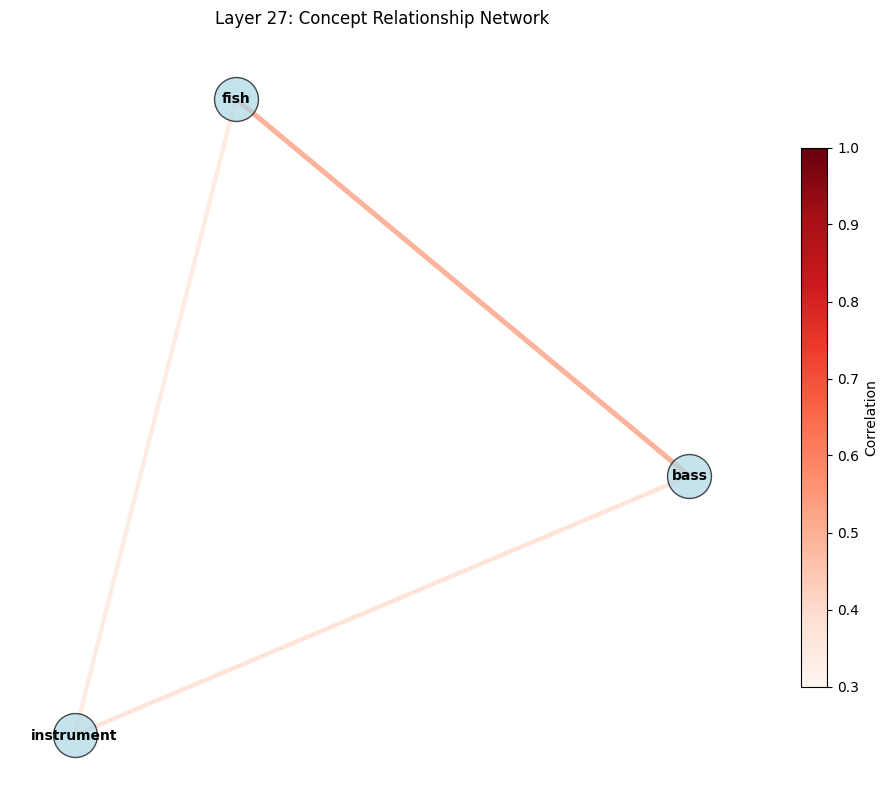

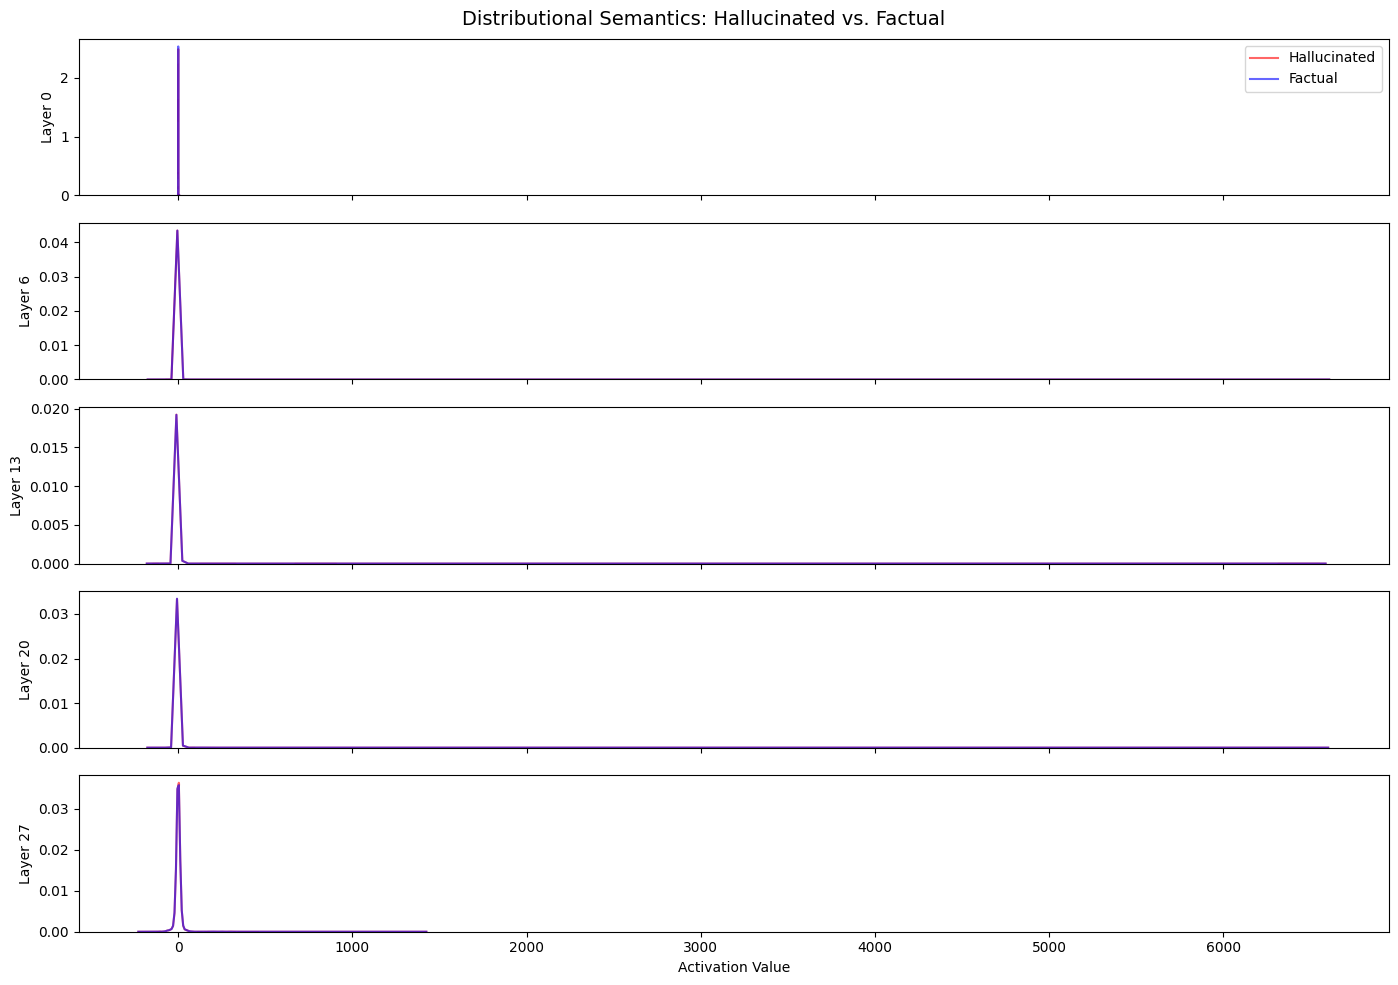

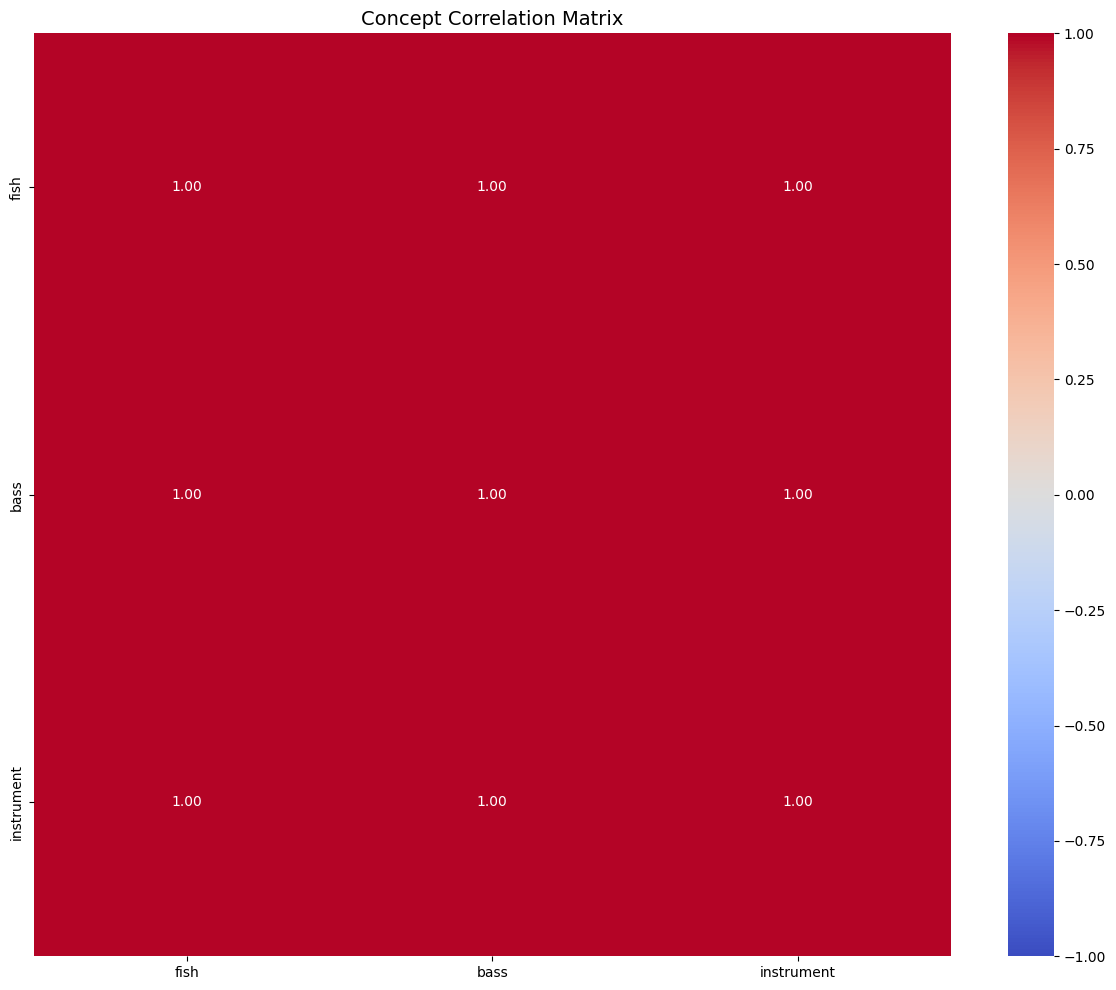

In [13]:
# Example usage
from transformers import AutoModelForCausalLM, AutoTokenizer
from ltr.dst import DistributionalSemanticsTracer

# Load model and tokenizer
model_name = "Qwen/Qwen3-0.6B"  # or any model you want to analyze
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Initialize the DST tracer
tracer = DistributionalSemanticsTracer(model, tokenizer)

# Run analysis with enhanced visualizations
result = tracer.run_analysis(
    prompt="I am at a concert. I see a bass. Is it a fish? Answer in yes or no:",
    factual_prompt="I am at a concert. I see a bass. It is a musical instrument.",
    concept_examples=["fish", "bass", "instrument"],
    hallucinated_output="yes",  # The incorrect answer (it's not a fish at a concert)
    run_intervention=False,
    enhanced_viz=True,  # Enable enhanced visualizations
)

print("Analysis complete!")
print(f"Generated visualizations:")
for viz_file in result.semantic_drift_trajectory.get("visualization_files", []):
    print(f" - {viz_file}")

# Display information about the hallucination
print("\nHallucination Analysis:")
print(f"Top spurious spans related to 'yes':")
for span in result.spurious_spans[:3]:
    print(f" - '{span['text']}' (score: {span['score']:.4f})")

if result.intervention_results:
    print("\nIntervention Results:")
    if "span_removal" in result.intervention_results:
        print(
            f"After removing '{result.intervention_results['span_removal']['removed_span']}':"
        )
        print(
            f" - New prediction: {result.intervention_results['span_removal']['predicted_next']}"
        )

    if "critical_layer_patching" in result.intervention_results:
        print(
            f"After patching critical layer {result.intervention_results['critical_layer_patching']['layer']}:"
        )
        print(
            f" - New prediction: {result.intervention_results['critical_layer_patching']['predicted_next']}"
        )
